In [35]:
import os
import glob
import xarray as xr
import geopandas as gpd
from shapely.geometry import mapping

In [5]:

# Read the shapefile
shapefile = gpd.read_file('ETH_ADM0.gpkg', layer='ETH_ADM0')

# Get a list of netCDF files
file_list = sorted(glob.glob('C:\\Users\\Zia Foisal\\Downloads\\ACAG\\*.nc'))

# Create a folder to save the clipped layers
output_folder = 'C:\\Users\\Zia Foisal\\Downloads\\ETH_ACAG\\'
os.makedirs(output_folder, exist_ok=True)

# Iterate over netCDF files
for file in file_list:
    # Open the netCDF file
    nc_file = xr.open_dataset(file)
    nc_file.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
    nc_file.rio.write_crs("epsg:4326", inplace=True)
        
    # Clip the netCDF data
    clipped_nc = nc_file.rio.clip(shapefile.geometry.apply(mapping), shapefile.crs, all_touched=True)
    
    # Set CRS for the clipped data
    clipped_nc.rio.write_crs('epsg:4326', inplace=True)
    
    # Save the clipped data to the output folder
    output_path = os.path.join(output_folder, os.path.basename(file).replace('.nc', '_clipped.nc'))
    clipped_nc.to_netcdf(output_path)
    print(f"Saved clipped data to {output_path}")

# Set CRS for the shapefile
shapefile.set_crs('epsg:4326', inplace=True, allow_override=True)

Saved clipped data to C:\Users\Zia Foisal\Downloads\ETH_ACAG\V6GL02.02.CNNPM25.Global.199801-199812_clipped.nc
Saved clipped data to C:\Users\Zia Foisal\Downloads\ETH_ACAG\V6GL02.02.CNNPM25.Global.199901-199912_clipped.nc
Saved clipped data to C:\Users\Zia Foisal\Downloads\ETH_ACAG\V6GL02.02.CNNPM25.Global.200001-200012_clipped.nc
Saved clipped data to C:\Users\Zia Foisal\Downloads\ETH_ACAG\V6GL02.02.CNNPM25.Global.200101-200112_clipped.nc
Saved clipped data to C:\Users\Zia Foisal\Downloads\ETH_ACAG\V6GL02.02.CNNPM25.Global.200201-200212_clipped.nc
Saved clipped data to C:\Users\Zia Foisal\Downloads\ETH_ACAG\V6GL02.02.CNNPM25.Global.200301-200312_clipped.nc
Saved clipped data to C:\Users\Zia Foisal\Downloads\ETH_ACAG\V6GL02.02.CNNPM25.Global.200401-200412_clipped.nc
Saved clipped data to C:\Users\Zia Foisal\Downloads\ETH_ACAG\V6GL02.02.CNNPM25.Global.200501-200512_clipped.nc
Saved clipped data to C:\Users\Zia Foisal\Downloads\ETH_ACAG\V6GL02.02.CNNPM25.Global.200601-200612_clipped.nc
S

,ADM0_EN,ADM0_PCODE,geometry
0,Ethiopia,ET,"MULTIPOLYGON (((42.86263 10.98429, 42.89097 10..."


In [37]:
eth_nc_files = glob.glob("C:\\Users\\Zia Foisal\\Downloads\\ETH_ACAG\\*.nc")
eth_nc_files

['C:\\Users\\Zia Foisal\\Downloads\\ETH_ACAG\\V6GL02.02.CNNPM25.Global.199801-199812_clipped.nc',
 'C:\\Users\\Zia Foisal\\Downloads\\ETH_ACAG\\V6GL02.02.CNNPM25.Global.199901-199912_clipped.nc',
 'C:\\Users\\Zia Foisal\\Downloads\\ETH_ACAG\\V6GL02.02.CNNPM25.Global.200001-200012_clipped.nc',
 'C:\\Users\\Zia Foisal\\Downloads\\ETH_ACAG\\V6GL02.02.CNNPM25.Global.200101-200112_clipped.nc',
 'C:\\Users\\Zia Foisal\\Downloads\\ETH_ACAG\\V6GL02.02.CNNPM25.Global.200201-200212_clipped.nc',
 'C:\\Users\\Zia Foisal\\Downloads\\ETH_ACAG\\V6GL02.02.CNNPM25.Global.200301-200312_clipped.nc',
 'C:\\Users\\Zia Foisal\\Downloads\\ETH_ACAG\\V6GL02.02.CNNPM25.Global.200401-200412_clipped.nc',
 'C:\\Users\\Zia Foisal\\Downloads\\ETH_ACAG\\V6GL02.02.CNNPM25.Global.200501-200512_clipped.nc',
 'C:\\Users\\Zia Foisal\\Downloads\\ETH_ACAG\\V6GL02.02.CNNPM25.Global.200601-200612_clipped.nc',
 'C:\\Users\\Zia Foisal\\Downloads\\ETH_ACAG\\V6GL02.02.CNNPM25.Global.200701-200712_clipped.nc',
 'C:\\Users\\Zia Foi

In [42]:
import numpy as np
# Initialize a list to store mean values
mean_values = []

# Loop through each file, calculate the mean 'PM25', and store the value
for file_path in eth_nc_files:
    ds = xr.open_dataset(file_path)
    pm25_mean = ds['PM25'].mean(dim=['lat', 'lon'])
    mean_values.append(pm25_mean.values)

# Calculate the overall mean from the individual means
overall_mean = np.mean(mean_values)

print('Overall Mean PM25 value:', overall_mean)

Overall Mean PM25 value: 21.142254


In [43]:
# Combine all files into a single dataset
combined_ds = xr.concat([xr.open_dataset(nc_file) for nc_file in eth_nc_files], dim='combinned')

# Calculate the mean 'PM25' across the new dimension for each lat and lon
mean_pm25_each_lat_lon = combined_ds['PM25'].mean(dim='combinned')

# Print the mean values for each lat and lon
print(mean_pm25_each_lat_lon)

<xarray.DataArray 'PM25' (lat: 1145, lon: 1500)> Size: 7MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 5kB 3.405 3.415 3.425 3.435 ... 14.82 14.84 14.85
  * lon      (lon) float32 6kB 32.99 33.01 33.01 33.03 ... 47.97 47.97 47.99


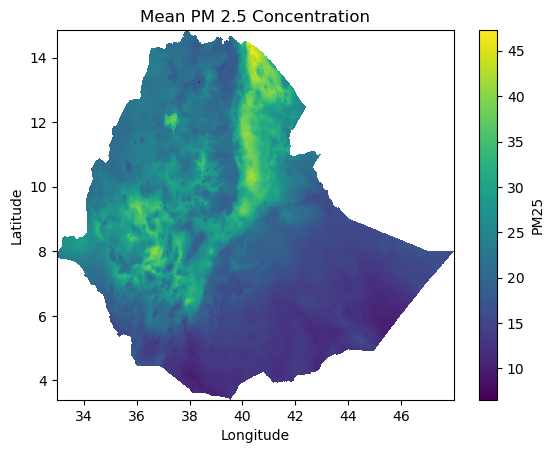

In [46]:
import xarray as xr
import matplotlib.pyplot as plt

# Plot the data
mean_pm25_each_lat_lon.plot()

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean PM 2.5 Concentration')

# Show the plot
plt.show()


In [48]:
mean_pm25_each_lat_lon.to_netcdf('C:\\Users\\Zia Foisal\\Downloads\\ETH_ACAG\\ETH_Combinned\\ETH_AP_1998to2022_mean.nc')
